In [73]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import obspy as op
import os
from obspy.taup import TauPyModel
from obspy.geodetics import kilometer2degrees, degrees2kilometers
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from obspy import UTCDateTime
import glob

In [79]:
DIR_EVENT = '/home/diogo/dados_doutorado/HIDROPHONE/events/'

In [80]:
datalistr = []
for root, dirs, files in os.walk(DIR_EVENT):
    for datafile in files:
        if datafile.endswith('.sac'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

In [81]:
datalistSr

['/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/057/2013.057.06.29.08.268/H2.2013.057.06.29.08.268.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/063/2013.063.13.10.25.272/H2.2013.063.13.10.25.272.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/091/2013.091.20.08.17.190/H2.2013.091.20.08.17.190.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/093/2013.093.05.31.33.707/H2.2013.093.05.31.33.707.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/098/2013.098.20.35.05.950/H2.2013.098.20.35.05.950.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/099/2013.099.03.45.57.739/H2.2013.099.03.45.57.739.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/104/2013.104.04.27.57.292/H2.2013.104.04.27.57.292.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/126/2013.126.21.15.04.198/H2.2013.126.21.15.04.198.sac',
 '/home/diogo/dados_doutorado/HIDROPHONE/events/H2/2013/127/2013.127.08.21.04.645/H2.2013.127.08

In [78]:
st = op.Stream()
for i,j in enumerate(datalistSr):
    st += op.read(j)

In [138]:
#st.decimate(10)

In [61]:
#st.filter('lowpass', freq=0.08)
#st.filter("highpass", freq=4) 

19 Trace(s) in Stream:
.H5..HHZ | 2013-02-26T06:28:54.726000Z - 2013-02-26T06:59:24.726116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-03-24T16:23:02.728000Z - 2013-03-24T16:53:32.728116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-01T20:07:48.604000Z - 2013-04-01T20:38:18.604116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-03T05:30:48.588000Z - 2013-04-03T06:01:18.588116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-08T20:34:58.754000Z - 2013-04-08T21:05:28.754116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-09T03:46:36.458000Z - 2013-04-09T04:17:06.458116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-14T04:28:36.764000Z - 2013-04-14T04:59:06.764116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-04-26T11:06:00.937000Z - 2013-04-26T11:36:30.937116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-05-06T21:15:00.788000Z - 2013-05-06T21:45:30.788116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-05-21T00:51:21.286000Z - 2013-05-21T01:21:51.286116Z | 240.0 Hz, 439201 samples
.H5..HHZ | 2013-0

In [82]:
dist_lst = [j.stats.sac.gcarc for i,j in enumerate(st)]

arg_list = np.argsort(dist_lst)

(0, 600)

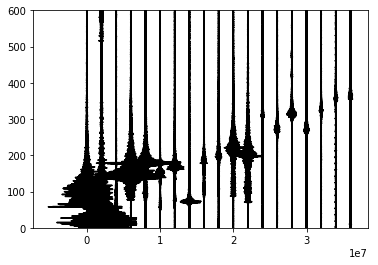

In [95]:
for i,j in enumerate(arg_list):
    plt.plot(st[j].data+i*2000000,st[j].times(),'-k')
    
    #plt.text(0,0.15,j.stats.sac.mag)
plt.ylim(0,600)
    #plt.show()

(0, 600)

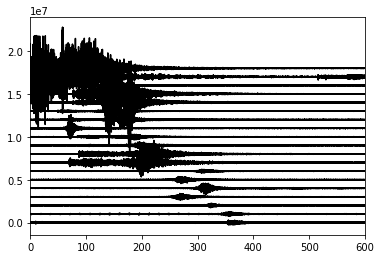

In [100]:
for i,j in enumerate(arg_list[::-1]):
    plt.plot(st[j].times(),st[j].data+i*1000000,'-k')
plt.xlim(0,600)